<a href="https://colab.research.google.com/github/jhanvikh/jhanvi/blob/main/rain_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install jovian
!

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6478 sha256=5469a17bf52385f4136d4808638a6e61d3b3d2ede17ef982652e127373329677
  Stored in directory: /root/.cache/pip/wheels/ed/08/9e/f0a977dfe55051a07e21af89200125d65f1efa60cbac61ed88
Successfully built uuid


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the dataset
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
# Create training, validation and test sets
year = pd.to_datetime(raw_df.Date).dt.year
train_df, val_df, test_df = raw_df[year < 2015], raw_df[year == 2015], raw_df[year > 2015]

# Create inputs and targets
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

In [ ]:
# Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Impute missing numerical values
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [ ]:
# Scale numeric features
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [ ]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


<ipython-input-13-29ea3012e81e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-13-29ea3012e81e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-13-29ea3012e81e>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Save processed data to disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

# Load processed data from disk
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

predictions


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model = DecisionTreeClassifier(random_state=42)


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,0.681604,0.801512,0.000000,0.037741,0.526244,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,0.693396,0.725898,0.001078,0.037741,0.526244,0.341085,0.069231,0.195402,0.54,0.30,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,0.634434,0.527410,0.005930,0.037741,0.526244,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,0.608491,0.538752,0.042049,0.037741,0.526244,0.255814,0.069231,0.195402,0.74,0.65,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,0.566038,0.523629,0.018329,0.037741,0.526244,0.193798,0.046154,0.103448,0.92,0.63,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037741,0.526244,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,0.266509,0.533081,0.000000,0.037741,0.526244,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,0.285377,0.568998,0.000000,0.037741,0.526244,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,0.327830,0.599244,0.000000,0.037741,0.526244,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
model.fit(X_train,train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
train_preds=model.predict(X_train)
train_probs=model.predict_proba(X_train)

In [ ]:
accuracy_score(train_targets, train_preds)


0.8519002326815528

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

In [ ]:
!pip install plotly matplotlib seaborn --quiet


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy_score(targets, preds)

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

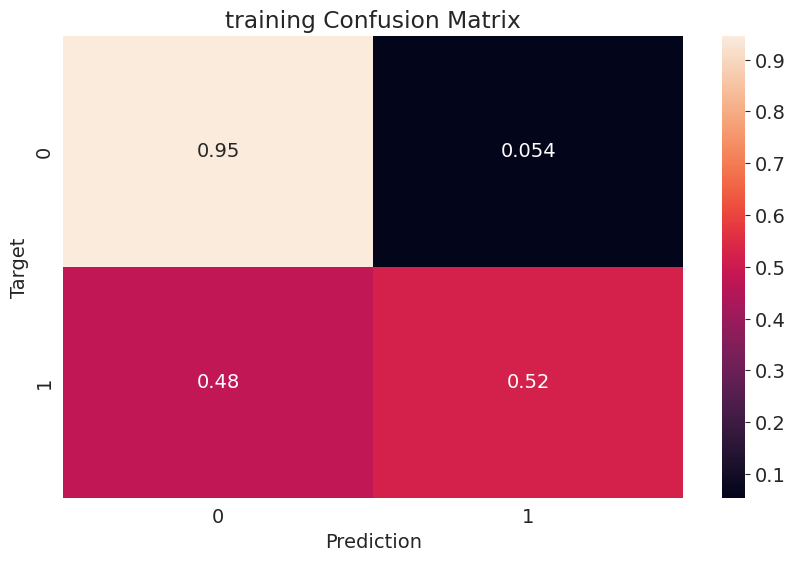

In [ ]:
predict_and_plot(X_train, train_targets, 'training')

In [ ]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [ ]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [ ]:
accuracy_score(test_targets, random_guess(X_test))

0.49894982497082846

In [ ]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

tree decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds=model.predict(X_train)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_probs=model.predict_proba(X_train)

In [ ]:
accuracy_score(train_targets,train_preds)

0.8519002326815528

In [ ]:
model.score(X_val, val_targets)


0.7948973023582422

In [ ]:
from sklearn.tree import plot_tree, export_text

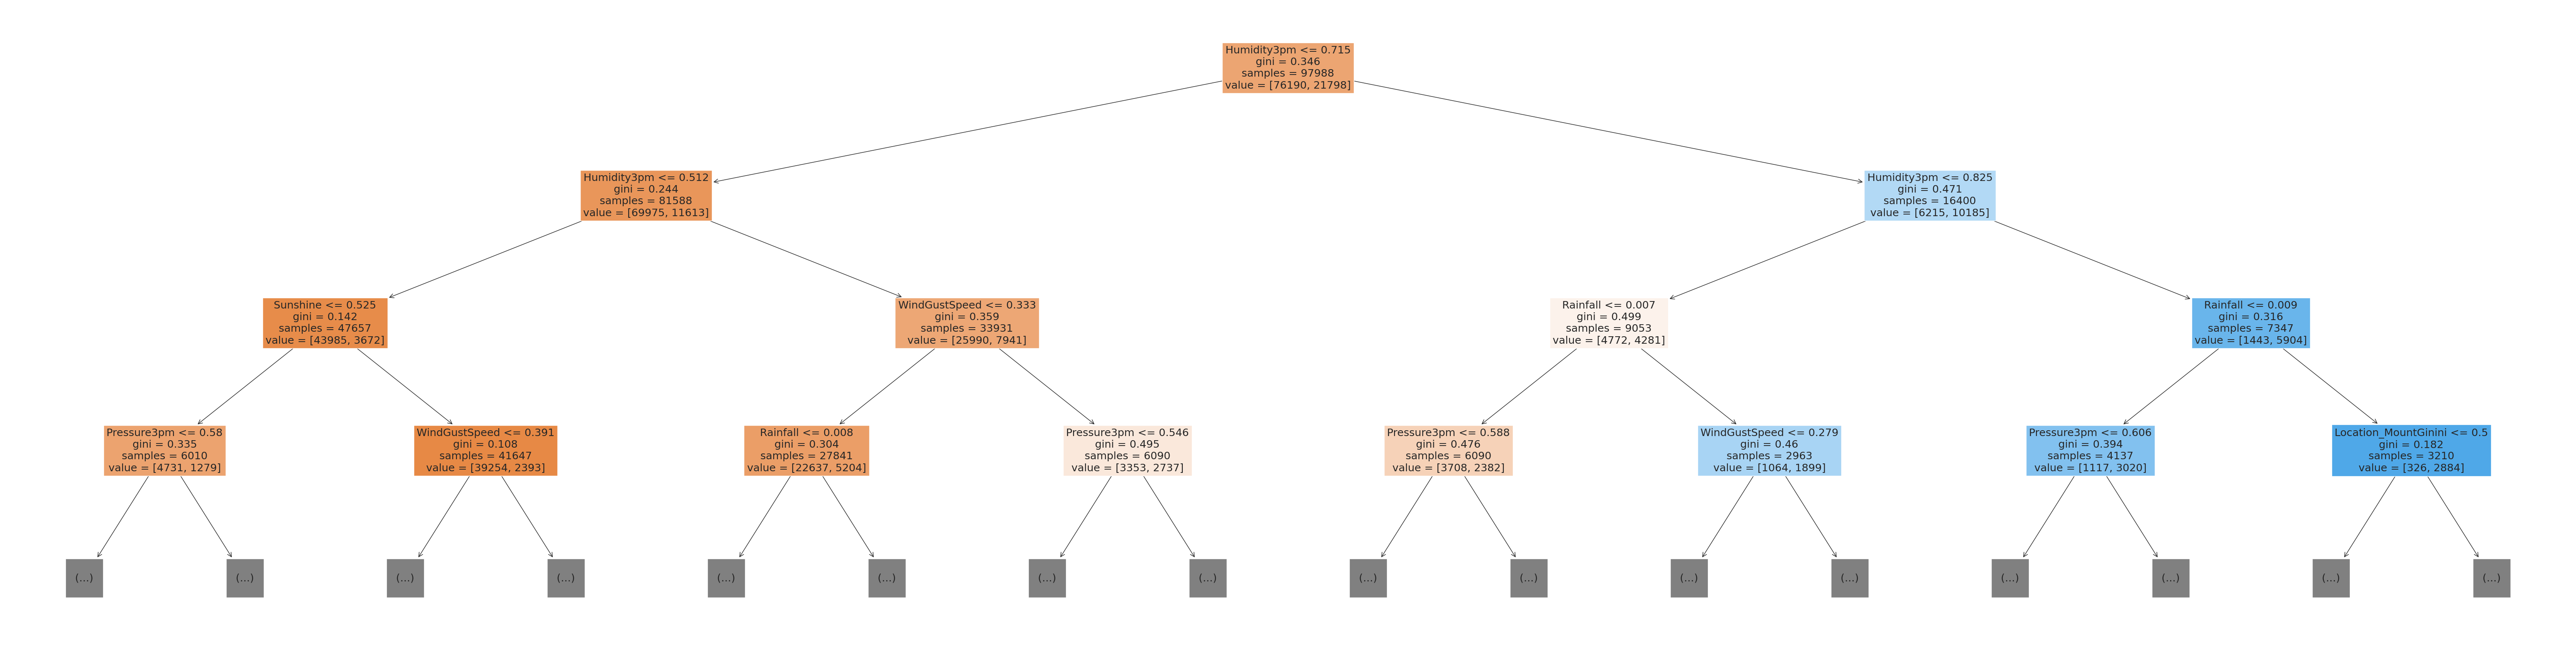

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=3,filled=True);

In [ ]:
model.tree_.max_depth

46

In [ ]:
export_text(model,feature_names=X_train.columns,max_depth=3);

In [ ]:
print(tree_text[:900])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- truncated branch of depth 24
|   |   |   |--- Pressure3pm >  0.58
|   |   |   |   |--- truncated branch of depth 26
|   |   |--- Sunshine >  0.53
|   |   |   |--- WindGustSpeed <= 0.39
|   |   |   |   |--- truncated branch of depth 36
|   |   |   |--- WindGustSpeed >  0.39
|   |   |   |   |--- truncated branch of depth 33
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- Rainfall <= 0.01
|   |   |   |   |--- truncated branch of depth 43
|   |   |   |--- Rainfall >  0.01
|   |   |   |   |--- truncated branch of depth 29
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- Pressure3pm >  0.55
|   |   |   |   |--- truncated branch of de


In [ ]:
model=DecisionTreeClassifier(max_depth=7,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.8508796995550476

In [ ]:
def max_depth_error(md):
  model=DecisionTreeClassifier(max_depth=md,random_state=42)
  model.fit(X_train,train_targets)
  train_err=1-model.score(X_train,train_targets)
  val_err=1-model.score(X_val,val_targets)
  return {'max depth':md,'train':train_err,'val':val_err}

In [ ]:
error_df=pd.DataFrame([max_depth_error(md) for md in range (1,11)])

In [ ]:
error_df

,max depth,train,val
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155890
6,7,0.149120,0.154836
7,8,0.144916,0.154368
8,9,0.139619,0.154544
9,10,0.132057,0.155656


In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8451635555035403

In [ ]:
 model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_targets)


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_val, val_targets)

0.8470361050968459

In [ ]:
model.score(X_train, train_targets)


0.8526350165326366

In [ ]:
model.tree_.max_depth

11

random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train,train_targets)

0.9999693840062048

In [ ]:
model.score(X_val,val_targets)

0.8565744045877465

In [ ]:
len(model.estimators_)

100

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [ ]:
model.feature_importances_

array([0.04283353, 0.04634722, 0.04652096, 0.02603772, 0.054286  ,
       0.05090691, 0.02979268, 0.03242966, 0.05387094, 0.14999774,
       0.05080692, 0.05463859, 0.02498819, 0.03848246, 0.04112029,
       0.00166776, 0.00193544, 0.00138217, 0.00068263, 0.00136427,
       0.00134233, 0.00136761, 0.00156028, 0.00119946, 0.00163008,
       0.00096314, 0.00203259, 0.00156776, 0.00084494, 0.00132033,
       0.00163789, 0.00035708, 0.00144978, 0.00122158, 0.00137154,
       0.00101416, 0.00097386, 0.00172069, 0.00142567, 0.00075848,
       0.00058535, 0.001522  , 0.0018386 , 0.00146189, 0.00100975,
       0.00100687, 0.00173385, 0.00139319, 0.0020206 , 0.00124472,
       0.00178366, 0.00123013, 0.00185142, 0.00164076, 0.00080849,
       0.00140791, 0.00026963, 0.00126937, 0.00200209, 0.0015156 ,
       0.00139668, 0.00272572, 0.00193351, 0.00082829, 0.00231695,
       0.00225927, 0.00226852, 0.00352854, 0.00276812, 0.00274866,
       0.0032441 , 0.0036023 , 0.00320869, 0.00277452, 0.00278